In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [209]:
df=pd.read_csv('D:/shree/titanic_train.csv')

In [210]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [211]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [212]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [213]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [214]:
df.shape


(891, 12)

In [215]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

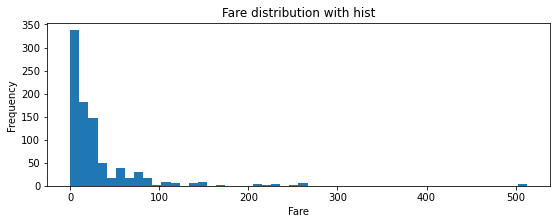

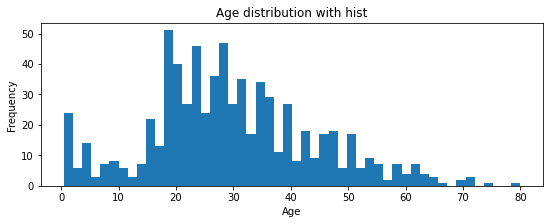

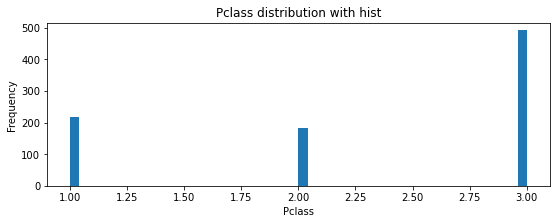

In [216]:
numericVar = ["Fare", "Age","Pclass"]
for n in numericVar:
    plot_hist(n)

# Basic Data Analysis
Pclass - Survived,
Sex - Survived,
SibSp - Survived,
Parch - Survived

In [217]:
# Plcass vs Survived
df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [218]:
# Sex vs Survived
df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [219]:
# Sibsp vs Survived
df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [220]:
# Parch vs Survived
df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [221]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [222]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Fill Missing Value
Embarked has 2 missing value

In [223]:
df.Embarked.value_counts().sort_values()

Q     77
C    168
S    644
Name: Embarked, dtype: int64

<AxesSubplot:>

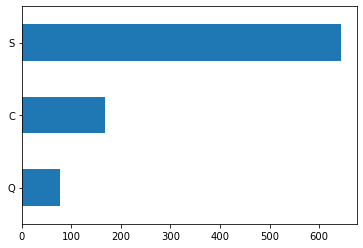

In [224]:
df.Embarked.value_counts().sort_values().plot(kind = 'barh')

In [225]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [226]:
x=df['Embarked']. value_counts()
x

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [227]:
y=df['Fare']. value_counts()
y

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

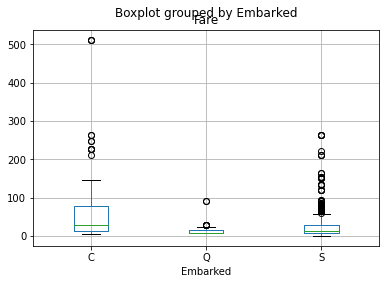

In [228]:
df.boxplot(column="Fare",by = "Embarked")
plt.show()

In [229]:
df["Embarked"] = df["Embarked"].fillna("C")


In [230]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# Visualization

# Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived


In [231]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]


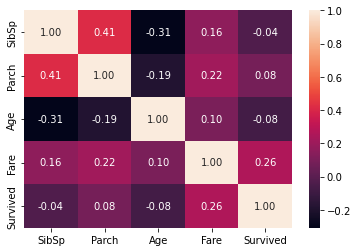

In [232]:
sns.heatmap(df[list1].corr(), annot = True, fmt = ".2f")
plt.show()

Fare feature seems to have correlation with survived feature (0.26).

# SibSp -- Survived

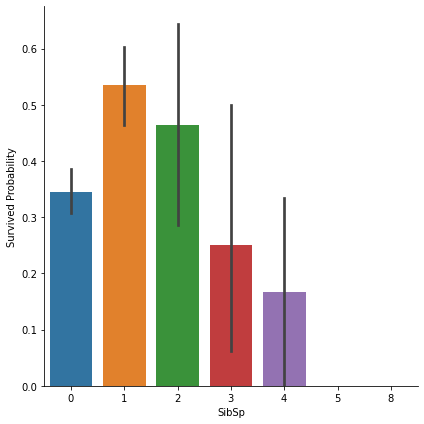

In [233]:

import warnings
warnings.filterwarnings('ignore')


g = sns.factorplot(x = "SibSp", y = "Survived", data =df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()



if sibsp == 0 or 1 or 2, passenger has more chance to survive

we can consider a new feature describing these categories.

# Parch -- Survived


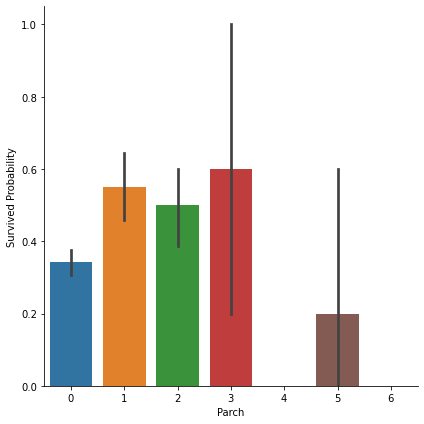

In [234]:
g = sns.factorplot(x = "Parch", y = "Survived", kind = "bar", data = df, size = 6)
g.set_ylabels("Survived Probability")
plt.show()

Sibsp and parch can be used for new feature extraction with the = 3

small familes have more chance to survive.

there is a std in survival of passenger with parch = 3

# Pclass -- Survived

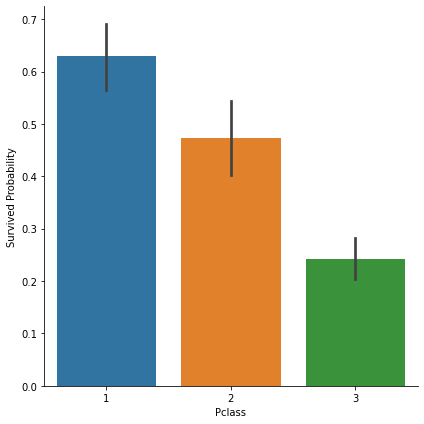

In [235]:
g = sns.factorplot(x = "Pclass", y = "Survived", data = df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

# Age -- Survived

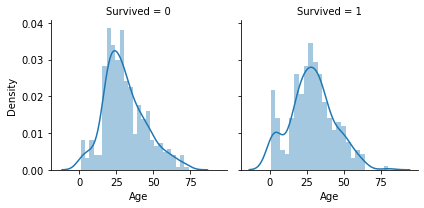

In [236]:
g = sns.FacetGrid(df, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()



use age feature in training

use age distribution for missing value of age

# Pclass -- Survived -- Age

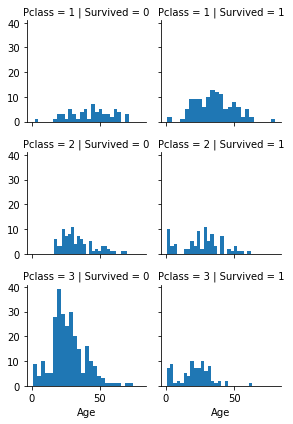

In [237]:
g = sns.FacetGrid(df, col = "Survived", row = "Pclass", size = 2)
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

pclass is important feature for model training.

# Embarked -- Sex -- Pclass -- Survived

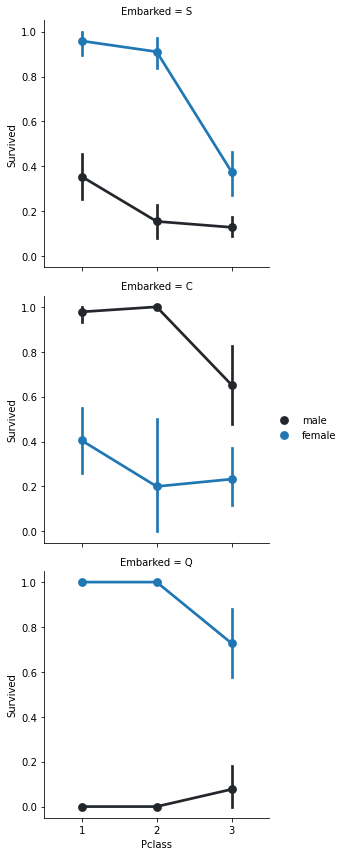

In [238]:
g = sns.FacetGrid(df, row = "Embarked", size = 4)
g.map(sns.pointplot, "Pclass","Survived","Sex")
g.add_legend()
plt.show()

1]  Female passengers have much better survival rate than males.

2]  males have better survşval rate in pclass 3 in C.

3]  embarked and sex will be used in training.

# Embarked -- Sex -- Fare -- Survived

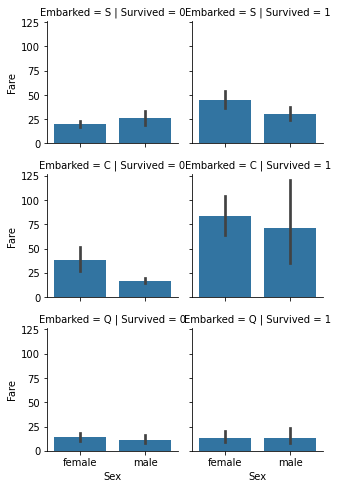

In [239]:
g = sns.FacetGrid(df, row = "Embarked", col = "Survived", size = 2.3)
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

Passsengers who pay higher fare have better survival. Fare can be used as categorical for training.

# Fill Missing: Age Feature

In [240]:
df[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


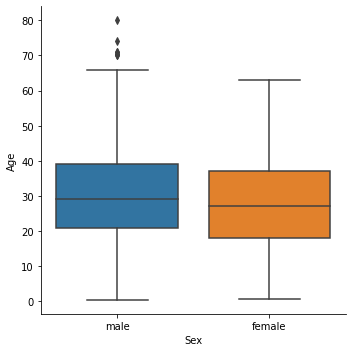

In [241]:
sns.factorplot(x = "Sex", y = "Age", data = df, kind = "box")
plt.show()

Sex is not informative for age prediction, age distribution seems to be same.

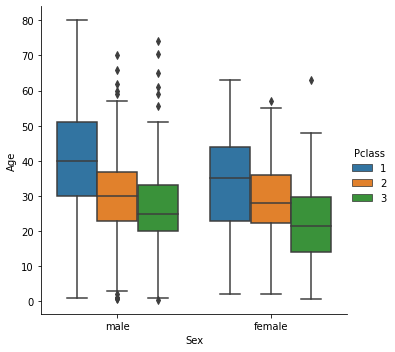

In [242]:
sns.factorplot(x = "Sex", y = "Age", hue = "Pclass",data =df, kind = "box")
plt.show()

1st class passengers are older than 2nd, and 2nd is older than 3rd class.

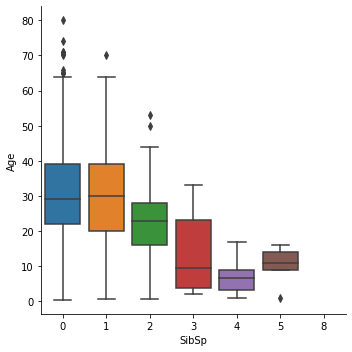

In [243]:

sns.factorplot(x = "SibSp", y = "Age", data = df, kind = "box")
plt.show()

# As from  abobe result filling the missing values of age and converting to numeric value.

In [244]:
df["Sex"] = [1 if i == "male" else 0 for i in df["Sex"]]

In [245]:
df["Sex"].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

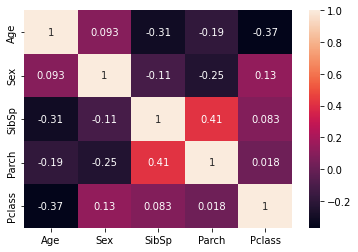

In [246]:
sns.heatmap(df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()

We can conclude that Age is not correlated with sex but it is correlated with parch, sibsp and pclass.

In [247]:
index_nan_age = list(df["Age"][df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = df["Age"][((df["SibSp"] == df.iloc[i]["SibSp"]) &(df["Parch"] == df.iloc[i]["Parch"])& (df["Pclass"] == df.iloc[i]["Pclass"]))].median()
    age_med = df["Age"].median()
    if not np.isnan(age_pred):
        df["Age"].iloc[i] = age_pred
    else:
        df["Age"].iloc[i] = age_med


In [248]:
df[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


#   Name -- Title

In [249]:
df["Name"].head(15)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
Name: Name, dtype: object

In [250]:
name = df["Name"]
df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [251]:
df["Title"].head(15)

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
5         Mr
6         Mr
7     Master
8        Mrs
9        Mrs
10      Miss
11      Miss
12        Mr
13        Mr
14      Miss
Name: Title, dtype: object

In [252]:
df.Title.value_counts().sort_values()

Jonkheer          1
Mme               1
Lady              1
Sir               1
Ms                1
Capt              1
the Countess      1
Don               1
Col               2
Mlle              2
Major             2
Rev               6
Dr                7
Master           40
Mrs             125
Miss            182
Mr              517
Name: Title, dtype: int64

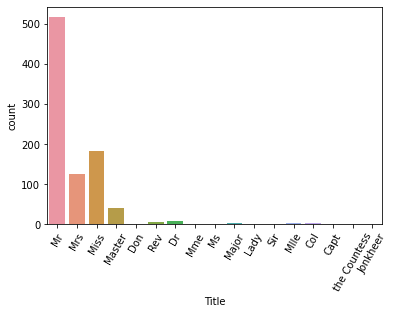

In [253]:
sns.countplot(x="Title", data = df)
plt.xticks(rotation = 60)
plt.show()

In [254]:
# convert to categorical
df["Title"] = df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in df["Title"]]
df["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

In [255]:
df.Title.value_counts().sort_values()

3     24
0     40
1    310
2    517
Name: Title, dtype: int64

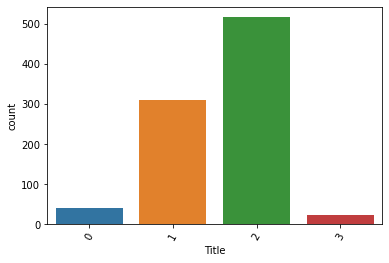

In [256]:
sns.countplot(x="Title", data = df)
plt.xticks(rotation = 60)
plt.show()

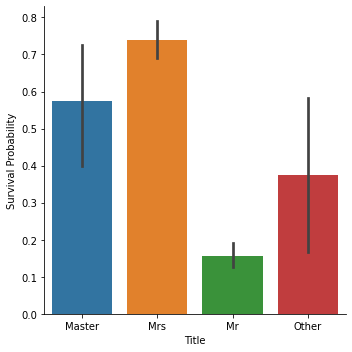

In [257]:
g = sns.factorplot(x = "Title", y = "Survived", data = df, kind = "bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [258]:
df.drop(labels = ["Name"], axis = 1, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,2


# Family Size

In [259]:
df["Fsize"] = df["SibSp"] + df["Parch"] + 1

In [260]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,1,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,1,2
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,2,1


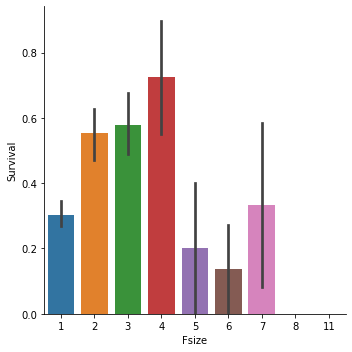

In [261]:
g = sns.factorplot(x = "Fsize", y = "Survived", data =df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [262]:
df["family_size"] = [1 if i < 5 else 0 for i in df["Fsize"]]

In [263]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,family_size
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,2,1
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,1,2,1
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,1,2,1
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,2,1,1
5,6,0,3,1,26.0,0,0,330877,8.4583,NaN,Q,2,1,1
6,7,0,1,1,54.0,0,0,17463,51.8625,E46,S,2,1,1
7,8,0,3,1,2.0,3,1,349909,21.0750,NaN,S,0,5,0
8,9,1,3,0,27.0,0,2,347742,11.1333,NaN,S,1,3,1
9,10,1,2,0,14.0,1,0,237736,30.0708,NaN,C,1,2,1


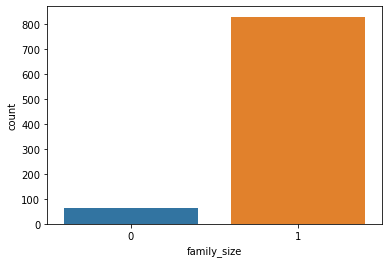

In [264]:
sns.countplot(x = "family_size", data = df)
plt.show()

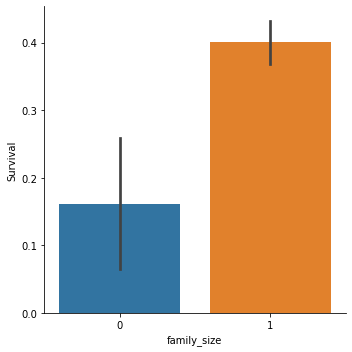

In [265]:
g = sns.factorplot(x = "family_size", y = "Survived", data = df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

Small familes have more chance to survive than large families.

In [266]:
df.drop(labels = ["PassengerId", "Cabin","Ticket"], axis = 1, inplace = True)

In [267]:
 df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fsize,family_size
0,0,3,1,22.0,1,0,7.2500,S,2,2,1
1,1,1,0,38.0,1,0,71.2833,C,1,2,1
2,1,3,0,26.0,0,0,7.9250,S,1,1,1
3,1,1,0,35.0,1,0,53.1000,S,1,2,1
4,0,3,1,35.0,0,0,8.0500,S,2,1,1


# Modelling

In [278]:
df.shape

(891, 11)

In [268]:
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
Fsize          0
family_size    0
dtype: int64

In [270]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fsize,family_size
0,0,3,1,22.0,1,0,7.2500,S,2,2,1
1,1,1,0,38.0,1,0,71.2833,C,1,2,1
2,1,3,0,26.0,0,0,7.9250,S,1,1,1
3,1,1,0,35.0,1,0,53.1000,S,1,2,1
4,0,3,1,35.0,0,0,8.0500,S,2,1,1
5,0,3,1,26.0,0,0,8.4583,Q,2,1,1
6,0,1,1,54.0,0,0,51.8625,S,2,1,1
7,0,3,1,2.0,3,1,21.0750,S,0,5,0
8,1,3,0,27.0,0,2,11.1333,S,1,3,1
9,1,2,0,14.0,1,0,30.0708,C,1,2,1


In [271]:
def tran_Embarked(x):
    if x == 'S':
        return 1
    if x == 'C':
        return 2
    if x == 'Q':
        return 3
    

In [272]:
df['Embarked']=df['Embarked'].apply(tran_Embarked)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fsize,family_size
0,0,3,1,22.0,1,0,7.2500,1,2,2,1
1,1,1,0,38.0,1,0,71.2833,2,1,2,1
2,1,3,0,26.0,0,0,7.9250,1,1,1,1
3,1,1,0,35.0,1,0,53.1000,1,1,2,1
4,0,3,1,35.0,0,0,8.0500,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1,3,1,1
887,1,1,0,19.0,0,0,30.0000,1,1,1,1
888,0,3,0,13.5,1,2,23.4500,1,1,4,1
889,1,1,1,26.0,0,0,30.0000,2,2,1,1


In [275]:
df['Fare'] = df['Fare'].astype(int)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fsize,family_size
0,0,3,1,22.0,1,0,7,1,2,2,1
1,1,1,0,38.0,1,0,71,2,1,2,1
2,1,3,0,26.0,0,0,7,1,1,1,1
3,1,1,0,35.0,1,0,53,1,1,2,1
4,0,3,1,35.0,0,0,8,1,2,1,1


In [279]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [281]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

maxAccu=0
maxRS=0
for i in range(1,891):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print('Best accuracy is ',maxAccu,'on random_state',maxRS)

Best accuracy is  0.8994413407821229 on random_state 396


# Simple Logistic Regression

In [283]:
logreg = LogisticRegression()
logreg.fit(_train, y_train)
acc_log_train = round(logreg.score(x_train, y_train)*100,2) 
acc_log_test = round(logreg.score(x_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 82.72
Testing Accuracy: % 82.68


# Hyperparameter Tuning -- Grid Search -- Cross Validation

In [287]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [288]:
random_state = 396
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [291]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8315140845070423
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.802112676056338
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8412949921752737
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.8301643192488262
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.775293427230047


Text(0.5, 1.0, 'Cross Validation Scores')

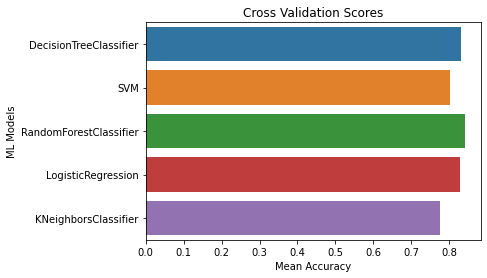

In [292]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

# Ensemble Modeling

In [294]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(x_train, y_train)
print(accuracy_score(votingC.predict(x_test),y_test))

0.8212290502793296
